In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to model in Google Drive
drive_model_path = '/content/drive/MyDrive/Machine Learning/Converted_Model/CORN.tflite'

# Copy the model to the current working directory
local_model_path = 'CORN.tflite'
shutil.copy(drive_model_path, local_model_path)

'CORN.tflite'

In [4]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path=local_model_path)
interpreter.allocate_tensors()

In [5]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [6]:
# Functions for loading and processing images
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

In [7]:
# Definition of class name map
class_names = {
    0: "Corn__northern_leaf_blight",
    1: "Corn__gray_leaf_spot",
    2: "Corn__common_rust",
    3: "Corn__healthy"
}

# Function to predict image by class name
def predict_image_with_tflite(interpreter, img_path):
    preprocessed_image = load_and_preprocess_image(img_path)
    interpreter.set_tensor(input_details[0]['index'], preprocessed_image)
    interpreter.invoke()
    predictions = interpreter.get_tensor(output_details[0]['index'])[0]

    # Displays the probability for each class
    for i, prob in enumerate(predictions):
        print(f"{class_names[i]}: {prob:.4f}")

    predicted_class = np.argmax(predictions)
    print(f"\nPredicted Class: {class_names[predicted_class]}")

Silakan unggah gambar untuk diprediksi.


Saving image (985).JPG to image (985) (1).JPG

Predicting for image: image (985) (1).JPG


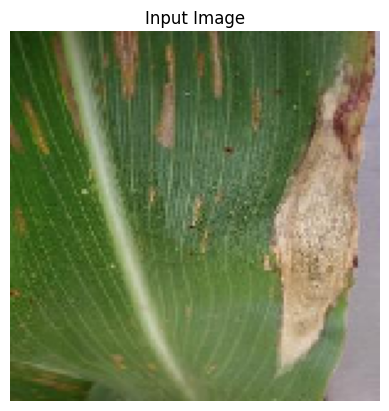

Corn__northern_leaf_blight: 0.0392
Corn__gray_leaf_spot: 0.7391
Corn__common_rust: 0.0013
Corn__healthy: 0.2204

Predicted Class: Corn__gray_leaf_spot


In [12]:
# Input from user
print("Silakan unggah gambar untuk diprediksi.")
uploaded = files.upload()

# Make predictions on each uploaded image
for filename in uploaded.keys():
    print(f"\nPredicting for image: {filename}")
    predict_image_with_tflite(interpreter, filename)